# Exploratory Data Analysis on Cricket T20 Internationals Dataset

### <b>About Dataset</b>

This extensive dataset serves as a comprehensive repository of historical information regarding T20 International (T20I) cricket matches dating back to the inception of the format. T20I cricket is renowned for its thrilling encounters, and this dataset meticulously documents the particulars of these matches. It stands as a valuable resource for cricket enthusiasts, statisticians, and analysts eager to delve into and dissect T20I cricket data.

<b> Key Features:</b>

- Match Details: Thorough information pertaining to each T20I match, encompassing match date, location, and format.

- Teams and Players: In-depth details about the participating teams, encompassing player names, roles, and batting/bowling statistics).
- Match Outcomes: Insights into match results, encompassing the victorious team and the margin of victory.
- Player of the Match: Recognition of the standout player in each T20I match.
- Umpires and Match Referees: Particulars of the officials responsible for overseeing the match.
- Toss Details: Revelations about the toss winner's decisions, which can significantly influence the game's trajectory.
- Venue Information: Location specifics, including stadium name, city, and country.

### Importing Liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading datasets

In [3]:
# All matches records
matches_data = pd.read_csv("./datasets/t20i_Matches_Data.csv")

# Players information
players_info = pd.read_csv("./datasets/players_info.csv")

#Batting Stats
batting_data = pd.read_csv("./datasets/t20i_Batting_Card.csv")

#Bowling Stats
bowling_data = pd.read_csv("./datasets/t20i_Bowling_Card.csv")


### Understanding and cleaning matches data

In [4]:
matches_data.head()

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [5]:
matches_data.columns

Index(['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name',
       'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)',
       'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2',
       'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner',
       'Match Result Text', 'MOM Player', 'Team1 Playing 11',
       'Team2 Playing 11', 'Debut Players'],
      dtype='object')

In [6]:
matches_data.shape

(2380, 33)

In [7]:
# Renaming columns
new_col = []
for col_name in matches_data.columns.to_list():
    new_col.append(col_name.replace(" ","_").lower())
    
matches_data.columns = new_col

In [8]:
matches_data.columns

Index(['t20i_match_no', 'match_id', 'match_name', 'series_id', 'series_name',
       'match_date', 'match_format', 'team1_id', 'team1_name', 'team1_captain',
       'team1_runs_scored', 'team1_wickets_fell', 'team1_extras_rec',
       'team2_id', 'team2_name', 'team2_captain', 'team2_runs_scored',
       'team2_wickets_fell', 'team2_extras_rec', 'match_venue_(stadium)',
       'match_venue_(city)', 'match_venue_(country)', 'umpire_1', 'umpire_2',
       'match_referee', 'toss_winner', 'toss_winner_choice', 'match_winner',
       'match_result_text', 'mom_player', 'team1_playing_11',
       'team2_playing_11', 'debut_players'],
      dtype='object')

In [9]:
matches_data.head()

,t20i_match_no,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,team1_captain,...,umpire_2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing_11,team2_playing_11,debut_players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [10]:
#Looking for null values
matches_data.isna().sum()

t20i_match_no              0
match_id                   0
match_name                 0
series_id                  0
series_name                0
match_date                11
match_format               0
team1_id                   0
team1_name                 0
team1_captain              0
team1_runs_scored         13
team1_wickets_fell        13
team1_extras_rec          13
team2_id                   0
team2_name                 0
team2_captain              0
team2_runs_scored         46
team2_wickets_fell        46
team2_extras_rec          46
match_venue_(stadium)      0
match_venue_(city)         0
match_venue_(country)      0
umpire_1                   2
umpire_2                   2
match_referee            441
toss_winner                1
toss_winner_choice        10
match_winner              91
match_result_text          0
mom_player               288
team1_playing_11           0
team2_playing_11           0
debut_players              0
dtype: int64

In [11]:
# Dropping Redundant columns
matches_data.drop(columns=['match_referee', 'umpire_1', 'umpire_2'], inplace=True)

In [12]:
matches_data.head(2)

,t20i_match_no,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,team1_captain,...,match_venue_(city),match_venue_(country),toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing_11,team2_playing_11,debut_players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,Melbourne,Australia,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,Christchurch,New Zealand,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"


In [13]:
matches_data.sort_values('t20i_match_no', inplace=True)

In [14]:
matches_data

,t20i_match_no,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,team1_captain,...,match_venue_(city),match_venue_(country),toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing_11,team2_playing_11,debut_players
10,1,211048,New Zealand Vs Australia Only T20I,238218,Australia tour of New Zealand - 2005 (2004/05),NaN,T20,2,Australia,2230,...,Auckland,New Zealand,Australia,bat,Australia,Australia won by 44 runs,2230.0,"['4176', '8876', '4382', '2230', '2066', '6259...","['10384', '2121', '7410', '9570', '5619', '193...","['4176', '4176', '10316', '4382', '10384', '10..."
11,2,211028,England Vs Australia Only T20I,238219,Australia tour of England and Scotland - 2005...,NaN,T20,1,England,4709,...,Southampton,England,England,bat,England,England won by 100 runs,8107.0,"['3865', '34719', '4271', '8107', '4709', '231...","['4176', '2119', '4382', '8876', '6256', '2230...","['4271', '7023', '2160', '34719', '2286', '228..."
12,3,222678,South Africa Vs New Zealand Only T20I,238166,New Zealand tour of South Africa - 2005 (2005...,NaN,T20,3,South Africa,10406,...,Johannesburg,South Africa,New Zealand,bowl,New Zealand,New Zealand won by 5 wickets (with 12 balls re...,11922.0,"['2239', '10406', '2232', '2347', '6335', '394...","['11922', '2121', '2235', '9633', '5619', '957...","['9505', '6343', '4086', '7540', '10406', '234..."
13,4,226374,Australia Vs South Africa Only T20I,226335,South Africa tour of Australia - 2005 (2005/06),NaN,T20,2,Australia,2230,...,Brisbane,Australia,Australia,bat,Australia,Australia won by 95 runs,2066.0,"['9235', '2066', '2230', '4382', '8876', '6256...","['10406', '3978', '2347', '3947', '2228', '223...","['4013', '3978', '6426', '9429', '9630', '1040..."
14,5,237242,New Zealand Vs West Indies Only T20I,237244,West Indies tour of New Zealand - 2006 (2005/06),NaN,T20,4,West Indies,2120,...,Auckland,New Zealand,New Zealand,bowl,NaN,Match tied,45554.0,"['7568', '7406', '10460', '45554', '6401', '21...","['10311', '2121', '2235', '9570', '1939', '356...","['7568', '7406', '7406', '21239', '21239', '47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,2376,1407107,Kenya Vs Zimbabwe 19Th Match,1407043,ICC Men's T20 World Cup Africa Region Qualifie...,2023-11-30,T20,9,Zimbabwe,52319,...,Windhoek,Namibia,Kenya,bowl,Zimbabwe,Zimbabwe won by 110 runs,52319.0,"['52319', '88165', '47206', '62733', '66876', ...","['21463', '113787', '98597', '56793', '98584',...","['104960', '104960']"
2376,2377,1407108,Rwanda Vs Uganda 20Th Match,1407043,ICC Men's T20 World Cup Africa Region Qualifie...,2023-11-30,T20,191,Rwanda,102720,...,Windhoek,Namibia,Uganda,bowl,Uganda,Uganda won by 9 wickets (with 71 balls remaining),104950.0,"['102721', '56713', '103210', '102720', '11597...","['66273', '102780', '49195', '110336', '75965'...",[]
2377,2378,1407109,Namibia Vs Nigeria 21St Match,1407043,ICC Men's T20 World Cup Africa Region Qualifie...,2023-11-30,T20,173,Nigeria,102143,...,Windhoek,Namibia,Nigeria,bat,Namibia,Namibia won by 8 wickets (with 40 balls remain...,65478.0,"['96952', '59808', '71168', '104908', '102144'...","['80905', '69544', '65478', '66916', '53164', ...",[]
2378,2379,1389394,India Vs Australia 4Th T20I,1389383,Australia in India - 2023 (2023/24),2023-12-01,T20,6,India,61990,...,Raipur,India,Australia,bowl,India,India won by 20 runs,67455.0,"['102743', '95094', '71331', '61990', '75591',...","['66190', '101339', '70392', '101340', '83439'...",['78281']


In [15]:
# Converting date values to Date Time format i.e Timestamp

matches_data['match_date'] = pd.to_datetime(matches_data['match_date'])

In [16]:
# Finding out time range of data
print(matches_data['match_date'].min())
print(matches_data['match_date'].max())

2006-06-15 00:00:00
2023-12-03 00:00:00


### Understanding & Cleaning player information data

In [17]:
players_info.head()

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600..."
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100..."
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900..."
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900..."


In [18]:
players_info.shape

(6678, 11)

In [19]:
players_info.isna().sum()

player_id              0
player_object_id       0
player_name            0
dob                   26
dod                 5420
gender                 0
batting_style         94
bowling_style       1151
country_id             2
image_url           2941
image_metadata      2941
dtype: int64

In [20]:
players_info['gender'].value_counts()

gender
M    6677
F       1
Name: count, dtype: int64

In [21]:
# Dropping Redundant Columns
players_info.drop(columns=['gender', 'image_url', 'image_metadata'], inplace=True)

In [22]:
players_info.head()

,player_id,player_object_id,player_name,dob,dod,batting_style,bowling_style,country_id
0,93957,1046619,Avinash Pai,1982-01-24,NaN,right-hand bat,right-arm offbreak,18.0
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,right-hand bat,right-arm medium,4.0
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,left-hand bat,NaN,25.0
3,2198,55935,Javed Omar,1976-11-25,NaN,right-hand bat,legbreak,25.0
4,52290,298438,Jason Roy,1990-07-21,NaN,right-hand bat,NaN,1.0


### Understanding & Cleaning batting stats data

In [23]:
batting_data.shape

(51737, 13)

In [24]:
batting_data.head(20)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
0,361657,1,Zimbabwe,10423.0,53.0,38.0,5.0,3.0,139.47,True,run out,['47099'],NaN
1,361657,1,Zimbabwe,49282.0,12.0,22.0,2.0,0.0,54.54,True,caught,['47738'],8270.0
2,361657,1,Zimbabwe,47619.0,8.0,26.0,0.0,0.0,30.76,True,caught,['19596'],47099.0
3,361657,1,Zimbabwe,10421.0,4.0,6.0,1.0,0.0,66.66,True,caught,['8270'],4169.0
4,361660,1,Pakistan,11647.0,44.0,41.0,4.0,1.0,107.31,True,caught,['15267'],50377.0
5,361657,1,Zimbabwe,45252.0,4.0,8.0,0.0,0.0,50.00,True,caught,['9257'],47099.0
6,361660,1,Pakistan,47738.0,0.0,5.0,0.0,0.0,0.00,True,caught,['11271'],11271.0
7,361657,1,Zimbabwe,10639.0,0.0,1.0,0.0,0.0,0.00,True,caught,['9257'],44908.0
8,361660,1,Pakistan,4169.0,14.0,13.0,1.0,0.0,107.69,True,caught,['8203'],15267.0
9,361531,1,Scotland,45548.0,22.0,27.0,1.0,0.0,81.48,True,bowled,NaN,45001.0


In [25]:
batting_data.tail(20)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
51717,1407109,2,Namibia,70085.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN
51718,1407106,2,Kenya,98584.0,27.0,23.0,1.0,1.0,117.39,True,bowled,NaN,102781.0
51719,1407718,2,Cambodia,97301.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN
51720,1407107,2,Kenya,104969.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN
51721,1407106,2,Kenya,53203.0,0.0,2.0,0.0,0.0,0.00,True,caught,['104950'],104950.0
51722,1407106,2,Kenya,53171.0,3.0,4.0,0.0,0.0,75.00,True,bowled,NaN,86017.0
51723,1407106,2,Kenya,61834.0,6.0,10.0,0.0,0.0,60.00,True,caught,['101619'],102781.0
51724,1407106,2,Kenya,63485.0,1.0,1.0,0.0,0.0,100.00,False,not out,['-'],NaN
51725,1407106,2,Kenya,104969.0,0.0,1.0,0.0,0.0,0.00,True,bowled,NaN,102781.0
51726,1407719,1,Cambodia,113874.0,24.0,18.0,0.0,3.0,133.33,True,caught,['104109'],113472.0


In [26]:
batting_data.sample(10)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
17925,1185315,2,England,53320.0,22.0,12.0,1.0,2.0,183.33,True,caught,['58511'],66941.0
30251,1282747,2,Denmark,109758.0,0.0,4.0,0.0,0.0,0.00,True,caught,['57153'],109683.0
23557,1217741,2,Malaysia,53817.0,22.0,24.0,2.0,1.0,91.66,True,bowled,NaN,53009.0
28032,1273734,2,Bangladesh,48277.0,9.0,12.0,1.0,0.0,75.00,True,caught,['59339'],51012.0
48794,1393330,2,Rwanda,103222.0,19.0,22.0,1.0,0.0,86.36,True,caught,['113251'],110326.0
15158,1144173,1,South Africa,47154.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN
44188,1359798,1,Argentina,110655.0,9.0,10.0,1.0,0.0,90.00,True,caught,['110670'],110668.0
17261,1184266,2,Uganda,101619.0,53.0,36.0,5.0,2.0,147.22,False,not out,['-'],NaN
32907,1298171,1,New Zealand,58403.0,28.0,33.0,2.0,0.0,84.84,True,caught,['66012'],97447.0
24371,1235830,2,Bulgaria,106675.0,4.0,5.0,0.0,0.0,80.00,True,bowled,NaN,108183.0


In [27]:
#Checking null values
batting_data.isna().sum()

Match ID          0
innings           0
team             26
batsman          26
runs          13368
balls         13368
fours         13368
sixes         13368
strikeRate    13368
isOut            26
wicketType       26
fielders      22231
bowler        26192
dtype: int64

In [28]:
# Dropping rows with null values in runs, balls, fours, sixes, strikeRate
batting_data.dropna(subset=['runs','balls','fours','sixes', 'strikeRate'], inplace=True)

In [29]:
batting_data.isna().sum()

Match ID          0
innings           0
team              0
batsman           0
runs              0
balls             0
fours             0
sixes             0
strikeRate        0
isOut             0
wicketType        0
fielders       8863
bowler        12824
dtype: int64

In [30]:
batting_data

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
0,361657,1,Zimbabwe,10423.0,53.0,38.0,5.0,3.0,139.47,True,run out,['47099'],NaN
1,361657,1,Zimbabwe,49282.0,12.0,22.0,2.0,0.0,54.54,True,caught,['47738'],8270.0
2,361657,1,Zimbabwe,47619.0,8.0,26.0,0.0,0.0,30.76,True,caught,['19596'],47099.0
3,361657,1,Zimbabwe,10421.0,4.0,6.0,1.0,0.0,66.66,True,caught,['8270'],4169.0
4,361660,1,Pakistan,11647.0,44.0,41.0,4.0,1.0,107.31,True,caught,['15267'],50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51725,1407106,2,Kenya,104969.0,0.0,1.0,0.0,0.0,0.00,True,bowled,NaN,102781.0
51726,1407719,1,Cambodia,113874.0,24.0,18.0,0.0,3.0,133.33,True,caught,['104109'],113472.0
51727,1407719,1,Cambodia,56820.0,25.0,29.0,2.0,0.0,86.20,False,not out,['-'],NaN
51728,1407719,1,Cambodia,102014.0,0.0,4.0,0.0,0.0,0.00,True,caught,['96722'],104107.0


In [31]:
batting_data.rename(columns= {'Match ID' : 'match_id'}, inplace=True)
batting_data

,match_id,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
0,361657,1,Zimbabwe,10423.0,53.0,38.0,5.0,3.0,139.47,True,run out,['47099'],NaN
1,361657,1,Zimbabwe,49282.0,12.0,22.0,2.0,0.0,54.54,True,caught,['47738'],8270.0
2,361657,1,Zimbabwe,47619.0,8.0,26.0,0.0,0.0,30.76,True,caught,['19596'],47099.0
3,361657,1,Zimbabwe,10421.0,4.0,6.0,1.0,0.0,66.66,True,caught,['8270'],4169.0
4,361660,1,Pakistan,11647.0,44.0,41.0,4.0,1.0,107.31,True,caught,['15267'],50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51725,1407106,2,Kenya,104969.0,0.0,1.0,0.0,0.0,0.00,True,bowled,NaN,102781.0
51726,1407719,1,Cambodia,113874.0,24.0,18.0,0.0,3.0,133.33,True,caught,['104109'],113472.0
51727,1407719,1,Cambodia,56820.0,25.0,29.0,2.0,0.0,86.20,False,not out,['-'],NaN
51728,1407719,1,Cambodia,102014.0,0.0,4.0,0.0,0.0,0.00,True,caught,['96722'],104107.0


### Understanding & Cleaning bowling stats data

In [32]:
bowling_data

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
0,300436,1,New Zealand,England,10303.0,4.0,24.0,0.0,35.0,1.0,8.75,10.0,3.0,2.0,1.0,0.0
1,300436,1,New Zealand,England,9711.0,4.0,24.0,0.0,45.0,1.0,11.25,5.0,6.0,1.0,1.0,0.0
2,300436,1,New Zealand,England,10325.0,3.0,18.0,0.0,43.0,2.0,14.33,5.0,3.0,4.0,1.0,0.0
3,300436,1,New Zealand,England,49108.0,4.0,24.0,0.0,22.0,2.0,5.50,10.0,1.0,1.0,0.0,0.0
4,300436,1,New Zealand,England,9570.0,3.0,18.0,0.0,25.0,0.0,8.33,8.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28112,1407719,1,Indonesia,Cambodia,104107.0,3.0,18.0,0.0,24.0,1.0,8.00,9.0,1.0,2.0,2.0,0.0
28113,1407719,1,Indonesia,Cambodia,113472.0,2.0,12.0,0.0,14.0,1.0,7.00,5.0,1.0,0.0,3.0,0.0
28114,1407719,1,Indonesia,Cambodia,116364.0,2.3,15.0,0.0,10.0,1.0,4.00,8.0,0.0,0.0,0.0,0.0
28115,1407719,1,Indonesia,Cambodia,104109.0,1.0,6.0,0.0,12.0,0.0,12.00,1.0,2.0,0.0,0.0,0.0


In [33]:
bowling_data.sample(20)

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
12673,1216418,1,Afghanistan,Ireland,90165.0,4.0,24.0,0.0,32.0,1.0,8.00,9.0,4.0,1.0,0.0,0.0
24827,1379580,2,Botswana,Kenya,71147.0,2.0,12.0,0.0,22.0,1.0,11.00,6.0,3.0,1.0,0.0,0.0
2340,489220,2,India,West Indies,47100.0,4.0,24.0,0.0,35.0,1.0,8.75,11.0,5.0,1.0,0.0,0.0
14814,1273149,1,Sweden,Finland,68381.0,4.0,24.0,0.0,27.0,0.0,6.75,8.0,1.0,1.0,0.0,0.0
2533,523735,1,Zimbabwe,Pakistan,47619.0,3.0,18.0,0.0,17.0,1.0,5.66,6.0,1.0,0.0,0.0,1.0
22009,1333928,1,Samoa,Fiji,100478.0,3.0,18.0,0.0,32.0,0.0,10.66,4.0,2.0,2.0,0.0,0.0
24946,1380581,1,Belgium,Germany,97529.0,4.0,24.0,0.0,40.0,0.0,10.00,6.0,4.0,1.0,3.0,0.0
15136,1273736,2,Sri Lanka,South Africa,67342.0,4.0,24.0,0.0,27.0,2.0,6.75,12.0,1.0,2.0,0.0,1.0
6993,1072317,1,Australia,England,54222.0,2.0,12.0,0.0,10.0,3.0,5.00,6.0,1.0,0.0,0.0,0.0
710,319142,2,Australia,West Indies,5966.0,2.0,12.0,0.0,26.0,0.0,13.00,2.0,3.0,1.0,1.0,0.0


In [34]:
# Checking null values
bowling_data.isna().sum()

Match ID         0
innings          0
team            26
opposition      26
bowler id       26
overs           26
balls           26
maidens         26
conceded        26
wickets         26
economy         26
dots          2011
fours         2011
sixes         2011
wides           26
noballs         26
dtype: int64

In [35]:
# Verying Null rows
bowling_data[bowling_data['team'].isna()]

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
369,287859,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,287859,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,354461,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,354461,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5238,876465,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5239,876465,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5262,876467,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5263,876467,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5845,951317,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5846,951317,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Dropping these rows
bowling_data.dropna(subset="team", inplace=True)

In [37]:
bowling_data.isna().sum()

Match ID         0
innings          0
team             0
opposition       0
bowler id        0
overs            0
balls            0
maidens          0
conceded         0
wickets          0
economy          0
dots          1985
fours         1985
sixes         1985
wides            0
noballs          0
dtype: int64

In [38]:
bowling_data[bowling_data['dots'].isna()]

# No need to drop these

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
239,264065,1,Zimbabwe,Bangladesh,4177.0,4.0,24.0,0.0,40.0,2.0,10.00,NaN,NaN,NaN,0.0,0.0
240,264065,1,Zimbabwe,Bangladesh,46653.0,3.0,18.0,0.0,33.0,1.0,11.00,NaN,NaN,NaN,1.0,1.0
241,264065,1,Zimbabwe,Bangladesh,45252.0,2.0,12.0,0.0,22.0,1.0,11.00,NaN,NaN,NaN,3.0,0.0
242,264065,1,Zimbabwe,Bangladesh,45326.0,4.0,24.0,0.0,25.0,3.0,6.25,NaN,NaN,NaN,0.0,1.0
243,264065,1,Zimbabwe,Bangladesh,47206.0,4.0,24.0,0.0,28.0,1.0,7.00,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27482,1403305,1,Argentina,Chile,105820.0,2.0,12.0,0.0,8.0,0.0,4.00,NaN,NaN,NaN,4.0,0.0
27483,1403305,2,Chile,Argentina,116137.0,2.0,12.0,0.0,17.0,0.0,8.50,NaN,NaN,NaN,1.0,0.0
27484,1403305,2,Chile,Argentina,106568.0,2.0,12.0,0.0,18.0,0.0,9.00,NaN,NaN,NaN,0.0,0.0
27485,1403305,2,Chile,Argentina,116128.0,1.0,6.0,0.0,7.0,0.0,7.00,NaN,NaN,NaN,0.0,0.0


In [39]:
bowling_data.rename(columns= {'Match ID' : 'match_id', 'bowler id' : 'bowler_id'}, inplace=True)
bowling_data

,match_id,innings,team,opposition,bowler_id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
0,300436,1,New Zealand,England,10303.0,4.0,24.0,0.0,35.0,1.0,8.75,10.0,3.0,2.0,1.0,0.0
1,300436,1,New Zealand,England,9711.0,4.0,24.0,0.0,45.0,1.0,11.25,5.0,6.0,1.0,1.0,0.0
2,300436,1,New Zealand,England,10325.0,3.0,18.0,0.0,43.0,2.0,14.33,5.0,3.0,4.0,1.0,0.0
3,300436,1,New Zealand,England,49108.0,4.0,24.0,0.0,22.0,2.0,5.50,10.0,1.0,1.0,0.0,0.0
4,300436,1,New Zealand,England,9570.0,3.0,18.0,0.0,25.0,0.0,8.33,8.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28112,1407719,1,Indonesia,Cambodia,104107.0,3.0,18.0,0.0,24.0,1.0,8.00,9.0,1.0,2.0,2.0,0.0
28113,1407719,1,Indonesia,Cambodia,113472.0,2.0,12.0,0.0,14.0,1.0,7.00,5.0,1.0,0.0,3.0,0.0
28114,1407719,1,Indonesia,Cambodia,116364.0,2.3,15.0,0.0,10.0,1.0,4.00,8.0,0.0,0.0,0.0,0.0
28115,1407719,1,Indonesia,Cambodia,104109.0,1.0,6.0,0.0,12.0,0.0,12.00,1.0,2.0,0.0,0.0,0.0


## Performing Exploratory Data Analysis(EDA) for finding useful insights and answering analytical questions.

### Which country has hosted the most number of matches?

In [40]:
matches_data.head(2)

,t20i_match_no,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,team1_captain,...,match_venue_(city),match_venue_(country),toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing_11,team2_playing_11,debut_players
10,1,211048,New Zealand Vs Australia Only T20I,238218,Australia tour of New Zealand - 2005 (2004/05),NaT,T20,2,Australia,2230,...,Auckland,New Zealand,Australia,bat,Australia,Australia won by 44 runs,2230.0,"['4176', '8876', '4382', '2230', '2066', '6259...","['10384', '2121', '7410', '9570', '5619', '193...","['4176', '4176', '10316', '4382', '10384', '10..."
11,2,211028,England Vs Australia Only T20I,238219,Australia tour of England and Scotland - 2005...,NaT,T20,1,England,4709,...,Southampton,England,England,bat,England,England won by 100 runs,8107.0,"['3865', '34719', '4271', '8107', '4709', '231...","['4176', '2119', '4382', '8876', '6256', '2230...","['4271', '7023', '2160', '34719', '2286', '228..."


In [41]:
matches_data['match_venue_(country)'].value_counts().nlargest(10)

match_venue_(country)
United Arab Emirates    236
Rwanda                  140
India                   128
West Indies             120
South Africa            119
Bangladesh              104
Australia               101
Oman                     99
England                  91
New Zealand              85
Name: count, dtype: int64

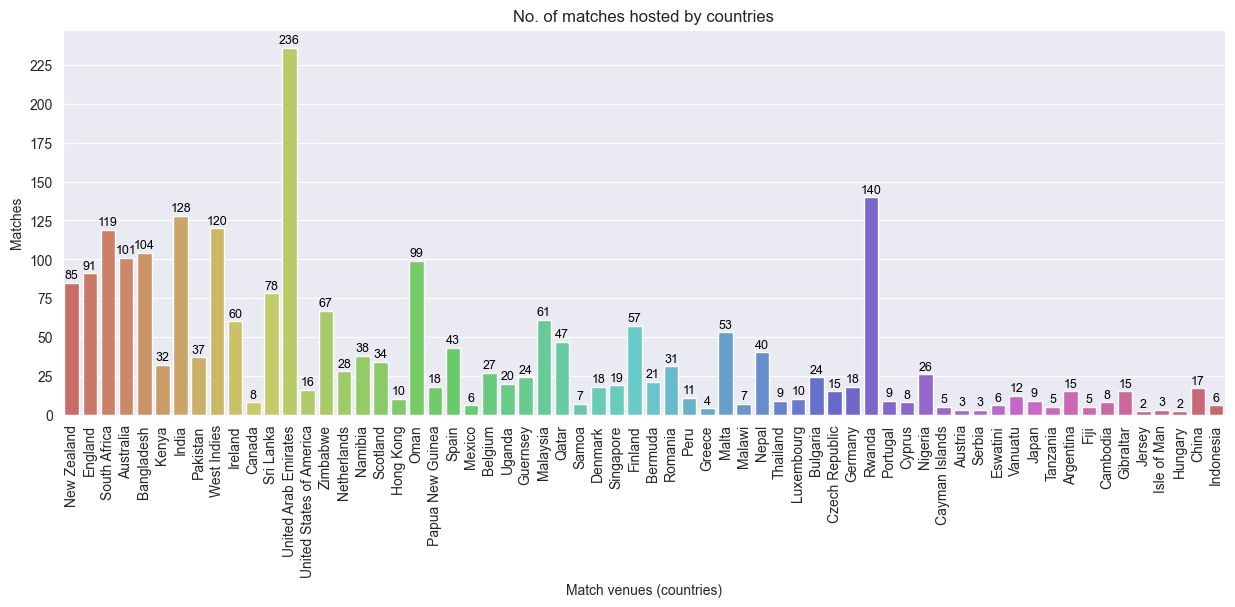

In [42]:
# Setting figure size
plt.figure( figsize = (15,5) )

# Setting figure style or theme
sns.set_style('darkgrid')

# Plotting chart
ax = sns.countplot(data=matches_data, x='match_venue_(country)', hue='match_venue_(country)', palette='hls')

# Setting labels with each bar count
for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=1, size=9, color="black")
    
# Customizations
plt.tick_params('x', rotation=90)
plt.xlabel("Match venues (countries)")
plt.ylabel("Matches")
plt.title("No. of matches hosted by countries")
plt.yticks([0,25,50,75,100,125,150,175,200,225])

# Show chart
plt.show()

<b> From the chart, we can see that United Arab Emirates has hosted the most number of T20I matches till now i.e 236 </b>

## Top 10 players with most man-of-the-match awards

In [43]:
matches_data['mom_player'].value_counts().nlargest(10)

mom_player
49752.0    15
46888.0    14
52319.0    13
61990.0    13
48405.0    12
84937.0    11
19647.0    11
48277.0    11
48739.0    11
71052.0    11
Name: count, dtype: int64

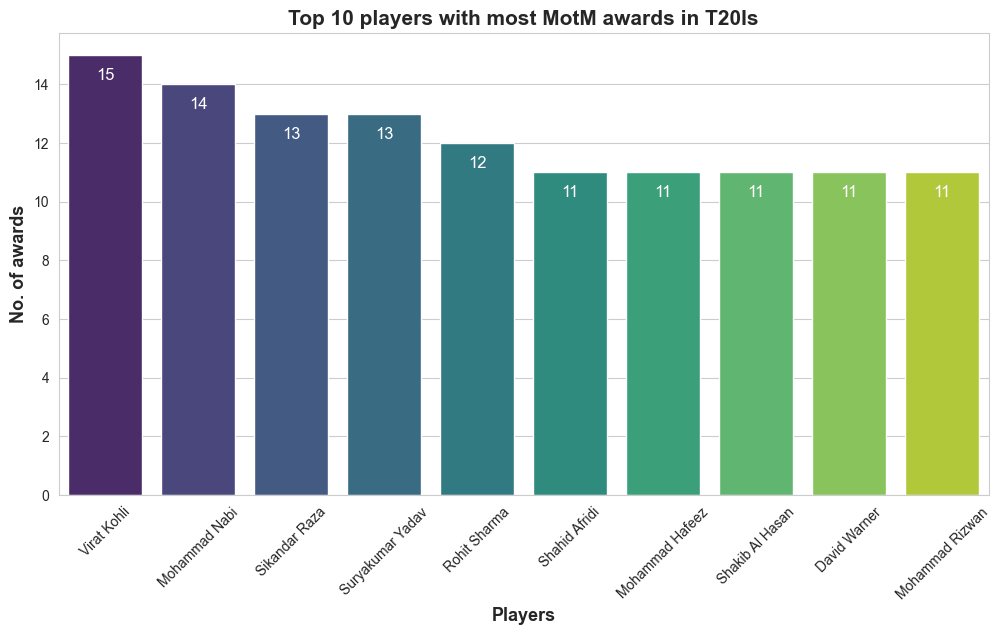

In [44]:
# Grouping the dataframe by 'mom_player' columns and aggregating the rows by counting the no. of awards
motm_players = matches_data.groupby('mom_player')[['mom_player']].count().rename(columns={'mom_player' : 'awards'})

# Merging the result dataframe with player info on each unique player id
motm_with_names = motm_players.merge(players_info, left_index=True, right_on='player_id')

# Setting size and theme
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

# Plotting by 10 largest no. of awards
ax = sns.barplot(x='player_name', y='awards', data=motm_with_names.nlargest(10,'awards'), hue='player_name', palette='viridis')

# Customizations
plt.tick_params('x', rotation=45)
plt.xlabel("Players", fontweight = 'bold', fontsize = 13)
plt.ylabel("No. of awards", fontweight = 'bold', fontsize = 13)
plt.title("Top 10 players with most MotM awards in T20Is", fontweight = 'bold', fontsize = 15)

# Setting bar label on each container
for container in ax.containers:
    ax.bar_label(container, padding=-20, size=12, color='white')


<b> Virat Kholi has won the most Man-of-the-Match awards followed by Muhammad Nabi and Sikandar Raza</b>

## Highest wicket takers in T20 Internationals

In [45]:
bowling_data.head()

,match_id,innings,team,opposition,bowler_id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
0,300436,1,New Zealand,England,10303.0,4.0,24.0,0.0,35.0,1.0,8.75,10.0,3.0,2.0,1.0,0.0
1,300436,1,New Zealand,England,9711.0,4.0,24.0,0.0,45.0,1.0,11.25,5.0,6.0,1.0,1.0,0.0
2,300436,1,New Zealand,England,10325.0,3.0,18.0,0.0,43.0,2.0,14.33,5.0,3.0,4.0,1.0,0.0
3,300436,1,New Zealand,England,49108.0,4.0,24.0,0.0,22.0,2.0,5.50,10.0,1.0,1.0,0.0,0.0
4,300436,1,New Zealand,England,9570.0,3.0,18.0,0.0,25.0,0.0,8.33,8.0,3.0,1.0,0.0,0.0


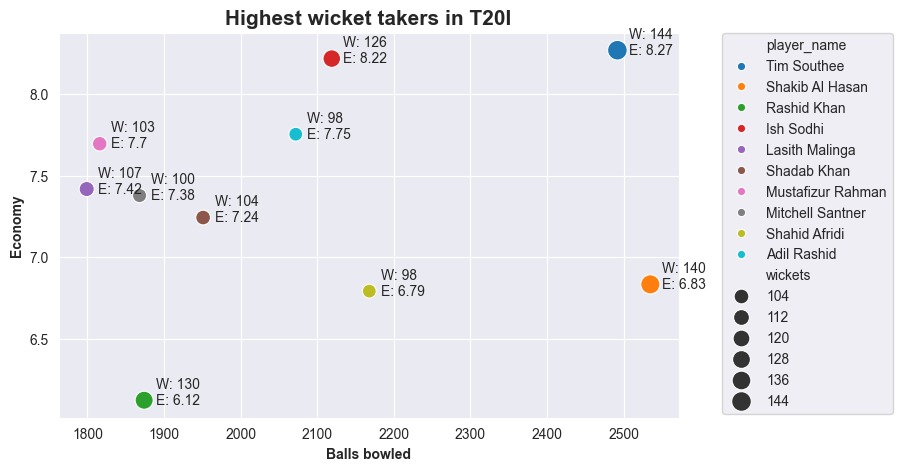

In [46]:
# Grouping data by bowler ids and aggregating balls, wickets and economy
bowlers_record = bowling_data.groupby('bowler_id')[['balls', 'wickets', 'economy']].agg(
    {'balls' : 'sum',
     'wickets' : 'sum',
     'economy' : 'mean'})

# Extracting top 10 bowlers by wickets
top_10_bowlers = bowlers_record.nlargest(10, 'wickets')

# Merging dataframe with players info
top_10_bowlers_names = top_10_bowlers.merge(players_info, left_index=True, right_on='player_id')

# Setting size and theme
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')

# Plotting with balls bowled on x-axis and economy on y-axis
ax = sns.scatterplot(x='balls', y='economy', data=top_10_bowlers_names, size='wickets', hue='player_name', sizes=(100,200))

# Customizing legend
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left', borderaxespad=0)

# Annotating points on the plot with wickets and economy
for lab,row in top_10_bowlers_names.iterrows():
    ax.annotate(f"W: { int(row['wickets']) }\nE: { round(row['economy'],2) }", xy=(row['balls']+15, row['economy']-0.025))

# Customizing the chart
ax.set_title("Highest wicket takers in T20I", fontweight = 'bold', fontsize=15)
ax.set_xlabel("Balls bowled", fontweight = 'bold')
ax.set_ylabel("Economy", fontweight = 'bold')

plt.show()

<b><li>Rashid Khan is the most economical bowler with 130 wickets <br>
<li> Tim Southee has the highest wickets uptill now but also with a high economy

## Highest run scorers in T20 Internationals

In [47]:
batting_data.head()

,match_id,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler
0,361657,1,Zimbabwe,10423.0,53.0,38.0,5.0,3.0,139.47,True,run out,['47099'],NaN
1,361657,1,Zimbabwe,49282.0,12.0,22.0,2.0,0.0,54.54,True,caught,['47738'],8270.0
2,361657,1,Zimbabwe,47619.0,8.0,26.0,0.0,0.0,30.76,True,caught,['19596'],47099.0
3,361657,1,Zimbabwe,10421.0,4.0,6.0,1.0,0.0,66.66,True,caught,['8270'],4169.0
4,361660,1,Pakistan,11647.0,44.0,41.0,4.0,1.0,107.31,True,caught,['15267'],50377.0


In [48]:
batsman_records = batting_data.pivot_table(values=['runs', 'balls', 'fours', 'sixes', 'strikeRate', 'isOut'], index='batsman',
                         aggfunc={'runs': 'sum', 'balls' : 'sum', 'fours' : 'sum', 'sixes' : 'sum', 'strikeRate' : 'mean', 'isOut' : 'sum'})

top_10_batsman = batsman_records.nlargest(10,'runs').reset_index()

top_10_batsman['batting_avg'] = top_10_batsman['runs'] / top_10_batsman['isOut']

top_10_batsman_names = top_10_batsman.merge(players_info, left_on='batsman', right_on='player_id')

top_10_batsman_names

,batsman,balls,fours,isOut,runs,sixes,strikeRate,batting_avg,player_id,player_object_id,player_name,dob,dod,batting_style,bowling_style,country_id
0,49752.0,2905.0,356.0,76,4008.0,117.0,123.425047,52.736842,49752,253802,Virat Kohli,1988-11-05,NaN,right-hand bat,right-arm medium,6.0
1,48405.0,2767.0,348.0,123,3853.0,182.0,116.962286,31.325203,48405,34102,Rohit Sharma,1987-04-30,NaN,right-hand bat,right-arm offbreak,6.0
2,48927.0,2602.0,309.0,111,3531.0,173.0,121.606356,31.810811,48927,226492,Martin Guptill,1986-09-30,NaN,right-hand bat,right-arm offbreak,5.0
3,56880.0,2714.0,371.0,84,3485.0,53.0,109.595408,41.488095,56880,348144,Babar Azam,1994-10-15,NaN,right-hand bat,right-arm offbreak,7.0
4,52631.0,2509.0,394.0,119,3408.0,123.0,114.846846,28.638655,52631,303427,Paul Stirling,1990-09-03,NaN,right-hand bat,right-arm offbreak,29.0
5,35812.0,2189.0,309.0,91,3120.0,125.0,119.522136,34.285714,35812,5334,Aaron Finch,1986-11-17,NaN,right-hand bat,slow left-arm orthodox,2.0
6,48739.0,2048.0,295.0,88,2894.0,105.0,124.308081,32.886364,48739,219889,David Warner,1986-10-27,NaN,left-hand bat,legbreak,2.0
7,54018.0,2197.0,243.0,57,2797.0,74.0,106.798219,49.070175,54018,323389,Mohammad Rizwan,1992-06-01,NaN,right-hand bat,NaN,7.0
8,53271.0,1912.0,244.0,79,2766.0,117.0,128.169400,35.012658,53271,308967,Jos Buttler,1990-09-08,NaN,right-hand bat,NaN,1.0
9,19647.0,2060.0,251.0,95,2514.0,76.0,107.168056,26.463158,19647,41434,Mohammad Hafeez,1980-10-17,NaN,right-hand bat,right-arm offbreak,7.0


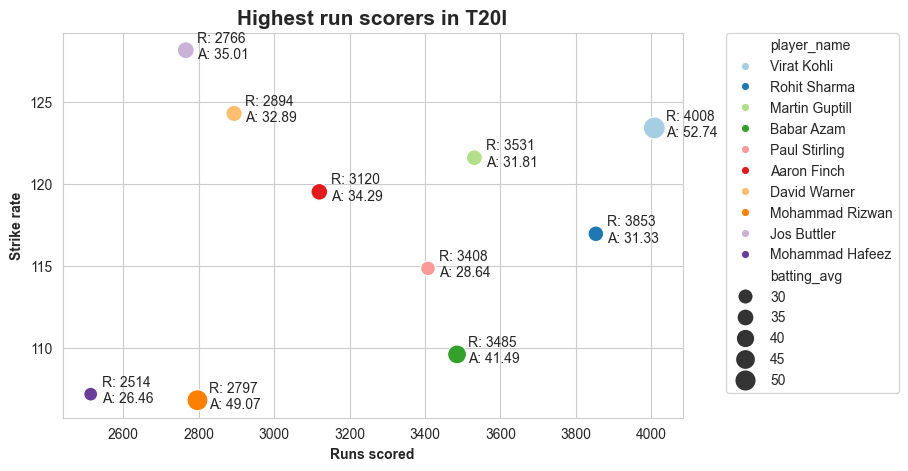

In [49]:
# Setting size and theme
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

# Plotting with balls bowled on x-axis and economy on y-axis
ax = sns.scatterplot(x='runs', y='strikeRate', data=top_10_batsman_names, size='batting_avg', 
                     hue='player_name', sizes=(100,250), palette='Paired')

# Customizing legend
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left', borderaxespad=0)

# Annotating points on the plot with wickets and economy
for lab,row in top_10_batsman_names.iterrows():
    ax.annotate(f"R: { int(row['runs']) }\nA: {round(row['batting_avg'],2)}", xy=(row['runs']+30, row['strikeRate']-0.5))

# Customizing the chart
ax.set_title("Highest run scorers in T20I", fontweight = 'bold', fontsize=15)
ax.set_xlabel("Runs scored", fontweight = 'bold')
ax.set_ylabel("Strike rate", fontweight = 'bold')

plt.show()

<b><li>Highest Run scorer is Virat Kohli with 4008 runs with average of 52.74<br><li> Jos Buttler has the highest strike rate.<br><li> Babar Azam has scored 3485 runs with average of 41.49

## Who hit most sixes?

In [50]:
batsman_records.head()

,balls,fours,isOut,runs,sixes,strikeRate
batsman,,,,,,
1934.0,12.0,2.0,True,10.0,0.0,83.330
1939.0,13.0,0.0,2,3.0,0.0,23.610
1979.0,8.0,0.0,True,5.0,0.0,62.500
1988.0,487.0,76.0,27,629.0,23.0,96.322
2034.0,15.0,0.0,False,11.0,1.0,73.330


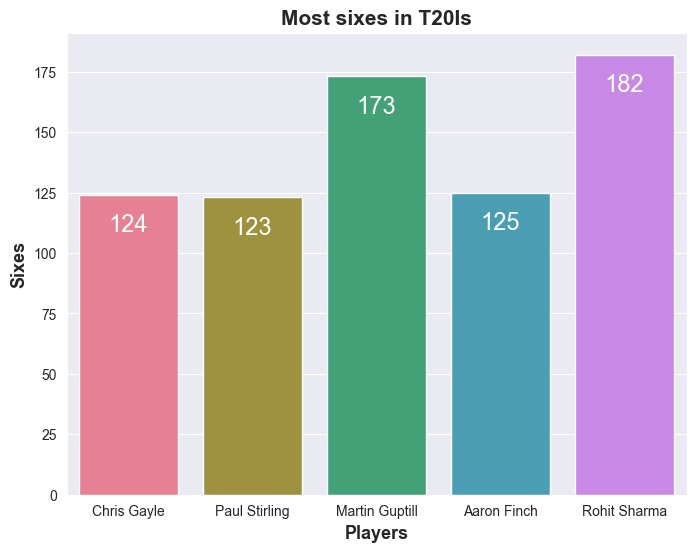

In [51]:
# Extracting top 5 players with most sixes and merging it with player info dataframe
top_5_sixes = batsman_records.nlargest(5,'sixes')
top_5_sixes_names = top_5_sixes.merge(players_info, left_index=True, right_on='player_id') 

# Setting size and theme
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

# Plotting values and setting title and labels
ax = sns.barplot(x='player_name', y='sixes', data=top_5_sixes_names.sample(5), hue='player_name', palette='husl')
ax.set_title("Most sixes in T20Is", fontweight = 'bold', fontsize=15)
ax.set_xlabel("Players", fontweight = 'bold', fontsize=13)
ax.set_ylabel("Sixes", fontweight = 'bold', fontsize=13)

# Setting label on each bar
for container in ax.containers:
    ax.bar_label(container, padding=-30, fontsize = 17, color='white')


<b><li> Rohit Sharma has hitted most sixes till now i.e 182

## Most successful teams in T20Is

In [52]:
matches_data.head(2)

,t20i_match_no,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,team1_captain,...,match_venue_(city),match_venue_(country),toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing_11,team2_playing_11,debut_players
10,1,211048,New Zealand Vs Australia Only T20I,238218,Australia tour of New Zealand - 2005 (2004/05),NaT,T20,2,Australia,2230,...,Auckland,New Zealand,Australia,bat,Australia,Australia won by 44 runs,2230.0,"['4176', '8876', '4382', '2230', '2066', '6259...","['10384', '2121', '7410', '9570', '5619', '193...","['4176', '4176', '10316', '4382', '10384', '10..."
11,2,211028,England Vs Australia Only T20I,238219,Australia tour of England and Scotland - 2005...,NaT,T20,1,England,4709,...,Southampton,England,England,bat,England,England won by 100 runs,8107.0,"['3865', '34719', '4271', '8107', '4709', '231...","['4176', '2119', '4382', '8876', '6256', '2230...","['4271', '7023', '2160', '34719', '2286', '228..."


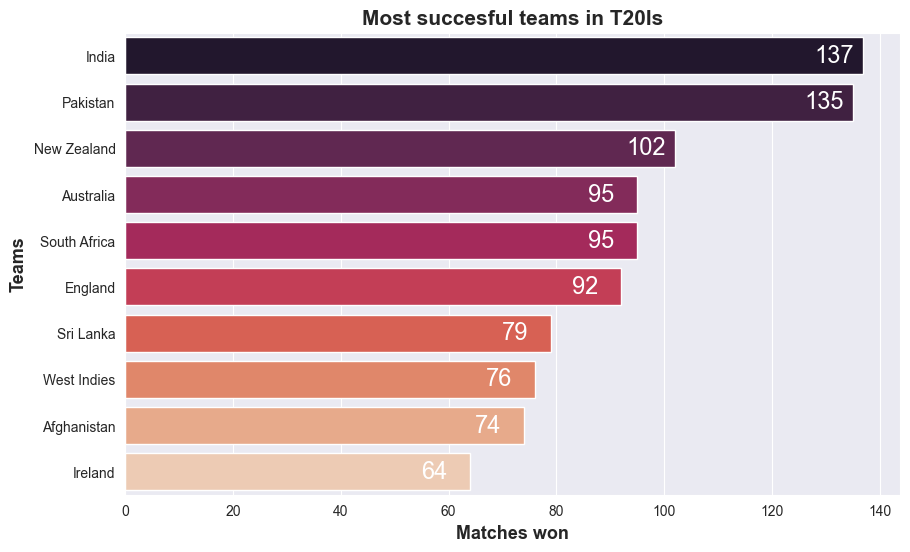

In [113]:
# Grouping by match winners and counting them
matches_win_countries = matches_data.pivot_table(values='match_id', index='match_winner', aggfunc='count').reset_index()

# Renaming and extracting 10 largest 
top_10_countries = matches_win_countries.rename(columns={'match_id':'matches_won', 'match_winner' : 'country'}).nlargest(10,'matches_won')

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

# Plotting
ax =sns.barplot(x='matches_won', y='country', data=top_10_countries, label="Won", hue='country', palette='rocket')

# Customizaitons
ax.set_title("Most succesful teams in T20Is", fontweight = 'bold', fontsize=15)
ax.set_xlabel("Matches won", fontweight = 'bold', fontsize=13)
ax.set_ylabel("Teams", fontweight = 'bold', fontsize=13)

# Setting label on each bar
for container in ax.containers:
    ax.bar_label(container, padding=-35, fontsize = 17, color='white')
    
plt.show()
